1.1添加文件

In [10]:
# 1. 导入 pandas 库
# pandas 是一个强大的数据分析库，我们用它来读取和处理表格数据（比如 .tsv 文件）。
import pandas as pd

# 2. 定义文件路径
# 因为我们的代码在 'scripts/preprocessing' 文件夹中运行，
# 所以需要先用 '../../' 返回到项目的根目录，
# 然后再指定 'data/raw_data/' 文件夹来找到我们的文件。
pg_matrix_path = '../../data/raw_data/report.pg_matrix.tsv'
pr_matrix_path = '../../data/raw_data/report.pr_matrix.tsv'

# 3. 读取 TSV 文件到 pandas DataFrame
# 我们使用 pd.read_csv() 函数来读取文件。
# 因为文件是制表符分隔的 (Tab-Separated Values, TSV)，
# 我们需要明确指定分隔符是 '\t'。
try:
    protein_df = pd.read_csv(pg_matrix_path, sep='\t')
    peptide_df = pd.read_csv(pr_matrix_path, sep='\t')

    # 4. 显示蛋白质组 (Protein Group) 矩阵的前5行
    # .head() 是一个非常方便的函数，默认可以查看 DataFrame 的前5行，帮助我们快速了解数据的大致结构。
    print("蛋白质组矩阵 (report.pg_matrix.tsv) 的前5行:")
    display(protein_df.head())

    # 5. 显示肽段 (Precursor) 矩阵的前5行
    print("\n肽段矩阵 (report.pr_matrix.tsv) 的前5行:")
    display(peptide_df.head())

except FileNotFoundError as e:
    print(f"文件未找到错误: {e}")
    print("\n请确认以下几点：")
    print("1. 您的 Jupyter Notebook 是否确实保存在 'scripts/preprocessing/' 文件夹中？")
    print("2. 'data' 和 'scripts' 文件夹是否在同一个项目根目录下？")
    print("3. 文件名 'report.pg_matrix.tsv' 和 'report.pr_matrix.tsv' 是否正确？")

蛋白质组矩阵 (report.pg_matrix.tsv) 的前5行:


,Protein.Group,Protein.Names,Genes,First.Protein.Description,N.Sequences,N.Proteotypic.Sequences,D:\20250902_SP_pre_experiment_1_data\JDL_1_RC7_1_32932.d,D:\20250902_SP_pre_experiment_1_data\JDL_2_RC8_1_32933.d,D:\20250902_SP_pre_experiment_1_data\JDL_3_RD1_1_32934.d,D:\20250902_SP_pre_experiment_1_data\JDL_4_RD2_1_32935.d
0,A0A075B5N3;A0A0G2JE47;Q6KB05,A0A075B5N3_MOUSE;A0A0G2JE47_MOUSE;Q6KB05_MOUSE,Igkv8-28;scFv,NaN,1,0,NaN,9172.38,314348.0,14467.6
1,A0A075B5P5;A0A1Y7VJN6;A0A4U9FKB1;Q6KAM2,A0A075B5P5_MOUSE;A0A1Y7VJN6_MOUSE;A0A4U9FKB1_M...,Ighg3,NaN,1,1,18983.3,NaN,NaN,22708.1
2,A0A087WNW3;A0A087WP14;A0A087WP48;A0A087WP85;A0...,A0A087WNW3_MOUSE;A0A087WP14_MOUSE;A0A087WP48_M...,Ktn1,NaN,9,7,125996.0,143374.00,NaN,169145.0
3,A0A087WP24;A0A087WPF8;A0A087WRJ2;A0A087WSR2;E9...,A0A087WP24_MOUSE;A0A087WPF8_MOUSE;A0A087WRJ2_M...,Abhd14b,NaN,4,4,28182.6,32479.30,52088.3,39553.1
4,A0A087WPC9,A0A087WPC9_MOUSE,Dnah7b,NaN,1,1,NaN,16579.90,68077.7,17971.0



肽段矩阵 (report.pr_matrix.tsv) 的前5行:


,Protein.Group,Protein.Ids,Protein.Names,Genes,First.Protein.Description,Proteotypic,Stripped.Sequence,Modified.Sequence,Precursor.Charge,Precursor.Id,D:\20250902_SP_pre_experiment_1_data\JDL_1_RC7_1_32932.d,D:\20250902_SP_pre_experiment_1_data\JDL_2_RC8_1_32933.d,D:\20250902_SP_pre_experiment_1_data\JDL_3_RD1_1_32934.d,D:\20250902_SP_pre_experiment_1_data\JDL_4_RD2_1_32935.d
0,P55012,P55012;E9QM38,S12A2_MOUSE,Slc12a2,NaN,1,AAAAAAAAAAAAAAAGAAGK,AAAAAAAAAAAAAAAGAAGK,3,AAAAAAAAAAAAAAAGAAGK3,9735.86,NaN,NaN,17339.5
1,Q3TW96,Q3TW96;Q8BVK3,UAP1L_MOUSE,Uap1l1,NaN,1,AAAAGALAPGPLPDLAAR,AAAAGALAPGPLPDLAAR,2,AAAAGALAPGPLPDLAAR2,62955.70,45491.4,NaN,67201.5
2,Q80X85,Q80X85,RT07_MOUSE,Mrps7,NaN,1,AAAATETSSVFADPVISK,AAAATETSSVFADPVISK,2,AAAATETSSVFADPVISK2,23096.40,18996.0,NaN,17385.5
3,E9PX29;Q8VIE5,E9PX29;E9PZC2;Q8VBX2;Q8VIE5;Q91ZE6,E9PX29_MOUSE;Q8VIE5_MOUSE,Sptbn4,NaN,1,AAAAWEER,AAAAWEER,2,AAAAWEER2,NaN,NaN,NaN,15692.2
4,E9Q6U4;Q3UWL8,E9Q6U4;Q3UWL8,E9Q6U4_MOUSE;Q3UWL8_MOUSE,Pfdn4,NaN,1,AAAEDVNVTFEDQQK,AAAEDVNVTFEDQQK,2,AAAEDVNVTFEDQQK2,46920.40,51620.6,301061.0,47975.8


1.2 数据清洗与过滤

1.2.1不需要进行反库的过滤，Q值过滤，可能需要清除污染物

这个步骤没有完成，一般会有一个污染物的库，这里我只是用了四个简单的蛋白作为污染物，然后进行简单的清除

In [11]:
# ==============================================================================
# (可选步骤) 预处理步骤 1: 移除已知的污染物
# ==============================================================================
#
# 解释:
# 蛋白质组学数据通常会包含在样本处理过程中引入的污染物，例如人源的角蛋白(KRT)、
# 用于酶切的胰蛋白酶(Trypsin)等。这些蛋白质不属于样本内源性蛋白，会干扰后续分析。
#
# 此代码框会根据一个预设的污染物关键词列表，从您的蛋白质矩阵中筛选并移除这些污染物。
#
# --- 如何使用 ---
# -> 如果您想执行去污染操作: 请直接运行此代码框。
# -> 如果您想暂时跳过此步骤: 请不要运行此代码框，直接运行后面的分析代码即可。
#
# 如果您运行后想反悔，只需重新运行最开始加载文件的代码框，即可恢复到原始数据。
# ------------------------------------------------------------------------------

# 1. 定义一个常见的污染物关键词列表
# 您可以根据需要向这个列表中添加或删除关键词。
# 'KRT' 和 'Keratin' 涵盖了大部分角蛋白。
contaminant_keywords = ['KRT', 'Keratin', 'Trypsin', 'trypsin']


# 2. 在执行任何操作前，先显示当前的蛋白质数量
print(f"执行此步骤前，蛋白质组数量为: {len(protein_df)}")
print("-" * 50) # 打印分隔线

# 3. 执行筛选操作
# 我们将创建一个布尔“掩码”(mask)，标记出哪些行是污染物
# 首先，我们确定用于筛选的列名，DIANN的结果中通常是 'Genes' 列
if 'Genes' in protein_df.columns:
    # str.contains() 用于查找包含列表中任何一个关键词的行
    # '|'.join(contaminant_keywords) 会生成一个正则表达式，例如 'KRT|Keratin|Trypsin'
    # na=False 表示如果单元格是空的(NaN)，则不视为污染物
    is_contaminant = protein_df['Genes'].str.contains('|'.join(contaminant_keywords), na=False)
    
    # 4. 使用 ~ (波浪号) 操作符进行反向选择，即保留所有“不是”污染物的行
    # 然后将筛选后的结果重新赋值给 protein_df 变量
    protein_df = protein_df[~is_contaminant]
    
    print("已根据 'Genes' 列成功移除污染物。")

# 也可以添加对'Protein.Ids'列的检查作为备用方案
elif 'Protein.Ids' in protein_df.columns:
    is_contaminant = protein_df['Protein.Ids'].str.contains('|'.join(contaminant_keywords), na=False)
    protein_df = protein_df[~is_contaminant]
    print("已根据 'Protein.Ids' 列成功移除污染物。")
    
else:
    print("警告: 未找到 'Genes' 或 'Protein.Ids' 列，无法执行去污染操作。")


# 5. 显示操作完成后的蛋白质数量和数据预览
print(f"执行此步骤后，剩余蛋白质组数量为: {len(protein_df)}")
print("\n数据预览 (已移除污染物):")
display(protein_df.head())

执行此步骤前，蛋白质组数量为: 4303
--------------------------------------------------
已根据 'Genes' 列成功移除污染物。
执行此步骤后，剩余蛋白质组数量为: 4303

数据预览 (已移除污染物):


,Protein.Group,Protein.Names,Genes,First.Protein.Description,N.Sequences,N.Proteotypic.Sequences,D:\20250902_SP_pre_experiment_1_data\JDL_1_RC7_1_32932.d,D:\20250902_SP_pre_experiment_1_data\JDL_2_RC8_1_32933.d,D:\20250902_SP_pre_experiment_1_data\JDL_3_RD1_1_32934.d,D:\20250902_SP_pre_experiment_1_data\JDL_4_RD2_1_32935.d
0,A0A075B5N3;A0A0G2JE47;Q6KB05,A0A075B5N3_MOUSE;A0A0G2JE47_MOUSE;Q6KB05_MOUSE,Igkv8-28;scFv,NaN,1,0,NaN,9172.38,314348.0,14467.6
1,A0A075B5P5;A0A1Y7VJN6;A0A4U9FKB1;Q6KAM2,A0A075B5P5_MOUSE;A0A1Y7VJN6_MOUSE;A0A4U9FKB1_M...,Ighg3,NaN,1,1,18983.3,NaN,NaN,22708.1
2,A0A087WNW3;A0A087WP14;A0A087WP48;A0A087WP85;A0...,A0A087WNW3_MOUSE;A0A087WP14_MOUSE;A0A087WP48_M...,Ktn1,NaN,9,7,125996.0,143374.00,NaN,169145.0
3,A0A087WP24;A0A087WPF8;A0A087WRJ2;A0A087WSR2;E9...,A0A087WP24_MOUSE;A0A087WPF8_MOUSE;A0A087WRJ2_M...,Abhd14b,NaN,4,4,28182.6,32479.30,52088.3,39553.1
4,A0A087WPC9,A0A087WPC9_MOUSE,Dnah7b,NaN,1,1,NaN,16579.90,68077.7,17971.0


2.1 肽段与蛋白质数目重复性检测

使用说明：
# 参数配置区：
1. 这里不用进行修改，这就是所有DIANN中都会有的列
2. 这里是进行列名修改的，有多少列修改多少列，前面那个是原列名，冒号后面是修改的列名
3. 不需要动
4. 这里根据自己的需求进行添加，有几个大组就添加几个字典，值代表一个大组内的重复名称，用修改后的名字即可
5. 6. 7.  如果这里设置为None，将进行多个大组之间的比较，因为每个大组内有若干的重复，这里的逻辑是，可以设置，只有在几个重复内出现的时候，才算做这个蛋白或肽段在这一组内出现。
    如果直接改为某一大组，比如“JDL”，那就只会进行组内分析，就是重复性检验


In [ ]:
# ==============================================================================
#                                 参数配置区 (修正版)
#                 您只需要修改这个代码框中的内容来控制整个分析流程
# ==============================================================================
import pandas as pd
from IPython.display import display, HTML

# 假设您的 protein_df 和 peptide_df 已经加载好了

# 1. 定义需要排除的元数据列
meta_data_columns = ['Protein.Group', 'Protein.Names', 'Genes', 'First.Protein.Description', 'N.Sequences', 'N.Proteotypic.Sequences' ]

# 2. 【可选】定义列名映射关系 (长名称 -> 短名称)
#    【修正】在字符串前加上 'r' 来创建原始字符串，避免反斜杠被错误解析。
column_mapping = {
    r'D:\20250902_SP_pre_experiment_1_data\JDL_1_RC7_1_32932.d': 'JDL_1',
    r'D:\20250902_SP_pre_experiment_1_data\JDL_2_RC8_1_32933.d': 'JDL_2',
    r'D:\20250902_SP_pre_experiment_1_data\JDL_3_RD1_1_32934.d': 'JDL_3',
    r'D:\20250902_SP_pre_experiment_1_data\JDL_4_RD2_1_32935.d': 'JDL_4',
}

# --- 诊断步骤 (可选，但推荐) ---
# 在重命名之前，打印出原始列名，以确保它们与您在上面定义的键完全匹配
print("--- 原始数据中的列名 ---")
print(protein_df.columns.tolist())
print("-" * 50)

# 3. 应用重命名 (如果定义了映射)
if column_mapping:
    protein_df.rename(columns=column_mapping, inplace=True)
    peptide_df.rename(columns=column_mapping, inplace=True)
    print("✅ 列名已根据您的定义更新！")
    print("\n--- 更新后的列名 ---")
    print(protein_df.columns.tolist())
    print("-" * 50)

# 4. 定义您的分组信息 (使用更新后的短名称)
#    您的这部分定义完全正确！
GROUP_DEFINITIONS = {
    'JDL': ['JDL_1', 'JDL_2', 'JDL_4'], # 包含3个重复
#   'JDL2' :['JDL_1', 'JDL_2','JDL_3' 'JDL_4'] #包含4个重复
}

# 5. 选择您想分析的模式
#    - 设置为 None:     将进行【多组间】的比较分析。
#    - 设置为 'JDL': 将只分析 'JDL' 组【内部】的重复性。
GROUP_TO_ANALYZE = 'JDL'

# 6. 【用于多组比较】选择要进行韦恩图比较的组 (最多3组)
#    此设置仅在 GROUP_TO_ANALYZE = None 时生效。
VENN_GROUPS_TO_COMPARE = ['JDL', 'JDL2']

# 7. 【用于多组比较】定义韦恩图的逻辑阈值
#    一个蛋白/肽段必须在组内至少N个重复中出现才被计数。
#    此设置仅在 GROUP_TO_ANALYZE = None 时生效。
VENN_REPLICATE_THRESHOLD = 2

--- 原始数据中的列名 ---
['Protein.Group', 'Protein.Names', 'Genes', 'First.Protein.Description', 'N.Sequences', 'N.Proteotypic.Sequences', 'D:\\20250902_SP_pre_experiment_1_data\\JDL_1_RC7_1_32932.d', 'D:\\20250902_SP_pre_experiment_1_data\\JDL_2_RC8_1_32933.d', 'D:\\20250902_SP_pre_experiment_1_data\\JDL_3_RD1_1_32934.d', 'D:\\20250902_SP_pre_experiment_1_data\\JDL_4_RD2_1_32935.d']
--------------------------------------------------
✅ 列名已根据您的定义更新！

--- 更新后的列名 ---
['Protein.Group', 'Protein.Names', 'Genes', 'First.Protein.Description', 'N.Sequences', 'N.Proteotypic.Sequences', 'JDL_1', 'JDL_2', 'JDL_3', 'JDL_4']
--------------------------------------------------


In [13]:
# ==============================================================================
#                      最终版 V3：函数定义区 (修正Seaborn语法)
# ==============================================================================
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2, venn3
from upsetplot import from_contents, UpSet
from IPython.display import display, HTML

# 【核心修正】使用兼容旧版本matplotlib的方式来重置配置参数。
mpl.rcParams.update(mpl.rcParamsDefault)
# 确保坐标轴的负号可以正常显示
plt.rcParams['axes.unicode_minus'] = False

# ... plot_venn_for_replicates 和 plot_upset_for_replicates 函数无需改动，保持原样 ...
def plot_venn_for_replicates(dataframe, data_type, columns_to_analyze):
    """
    Draws a Venn diagram for 2 or 3 replicates for [intra-group] reproducibility check.
    """
    print(f"\n--- Intra-group Replicates Venn Diagram ---")
    sets = []
    for col_name in columns_to_analyze:
        identified_ids = dataframe[col_name].dropna().index.tolist()
        sets.append(set(identified_ids))
    plt.figure(figsize=(8, 8))
    if len(columns_to_analyze) == 2:
        venn2(subsets=sets, set_labels=columns_to_analyze)
    elif len(columns_to_analyze) == 3:
        venn3(subsets=sets, set_labels=columns_to_analyze)
    plt.title(f'Identification Overlap within {data_type.split(" ")[0]} Replicates', fontsize=16)
    plt.show()

def plot_upset_for_replicates(dataframe, data_type, columns_to_analyze):
    """
    Draws an Upset Plot for more than 3 replicates for [intra-group] reproducibility check.
    """
    print(f"\n--- Intra-group Replicates Upset Plot ---")
    contents_for_upset = {col: dataframe[col].dropna().index.tolist() for col in columns_to_analyze}
    upset_data = from_contents(contents_for_upset)
    plt.figure(figsize=(12, 6))
    upset_plot = UpSet(upset_data, subset_size='count', sort_by='cardinality', show_counts=True)
    upset_plot.plot()
    plt.suptitle(f'Identification Overlap within {data_type.split(" ")[0]} Replicates', fontsize=16)
    plt.show()


def analyze_base_stats_and_inter_group_venn(dataframe, data_type, columns_to_analyze, 
                                            all_group_definitions=None, venn_group_names=None, 
                                            venn_threshold=1):
    """
    Performs basic stats (count table and bar plot) and draws a Venn diagram for [inter-group] comparison.
    """
    display(HTML(f"<h2>{data_type} Reproducibility Analysis</h2>"))
    print(f"Analyzing samples: {', '.join(columns_to_analyze)}\n")

    # 1. 统计每个样本的非NaN计数
    counts = dataframe.loc[:, columns_to_analyze].notna().sum()
    counts_df = counts.to_frame(name='Number of Identifications')
    print("--- 1. Table of Identification Counts per Sample ---")
    display(counts_df)
    
    # 2. 绘制柱状图
    print("\n--- 2. Bar Plot of Identification Counts per Sample ---")
    plt.figure(figsize=(max(8, len(columns_to_analyze)*0.8), 6))
    
    # 【核心修正】更新seaborn的调用语法以消除FutureWarning。
    # 根据警告的建议，将x变量也赋给hue，并关闭图例。
    sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette='viridis', legend=False)
    
    for index, value in enumerate(counts):
        plt.text(index, value + (counts.max() * 0.01), str(value), ha='center', va='bottom')
    plt.ylabel(f'Number of {data_type.split(" ")[0]} Identifications', fontsize=12)
    plt.xlabel('Sample Name', fontsize=12)
    plt.title(f'Number of {data_type} Identifications', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # 3. 为【多组间比较】绘制韦恩图
    if venn_group_names and len(venn_group_names) in [2, 3]:
        print(f"\n--- 3. Inter-group Venn Diagram (Logic: Present in at least {venn_threshold} replicates) ---")
        sets = []
        for group_name in venn_group_names:
            group_columns = all_group_definitions[group_name]
            identified_ids = dataframe.dropna(subset=group_columns, thresh=venn_threshold).index.tolist()
            sets.append(set(identified_ids))
            
        plt.figure(figsize=(8, 8))
        if len(venn_group_names) == 2:
            venn2(subsets=sets, set_labels=venn_group_names)
        else:
            venn3(subsets=sets, set_labels=venn_group_names)
        plt.title(f'Shared and Unique {data_type.split(" ")[0]} Counts Between Groups', fontsize=16)
        plt.show()

✅ Mode: [Intra-group Analysis] | Analyzing group: 'JDL' | Replicates: 3
--------------------------------------------------


Analyzing samples: JDL_1, JDL_2, JDL_4

--- 1. Table of Identification Counts per Sample ---


,Number of Identifications
JDL_1,4194
JDL_2,4144
JDL_4,4116



--- 2. Bar Plot of Identification Counts per Sample ---


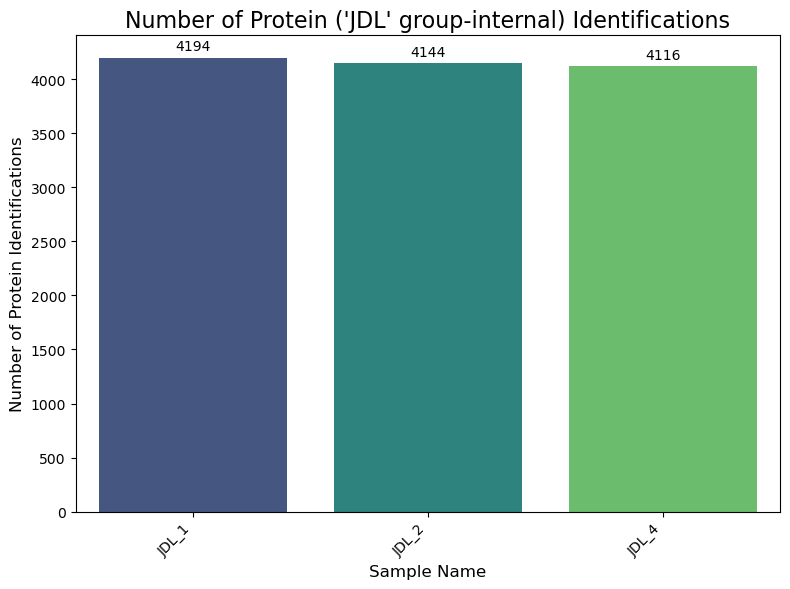


--- Intra-group Replicates Venn Diagram ---


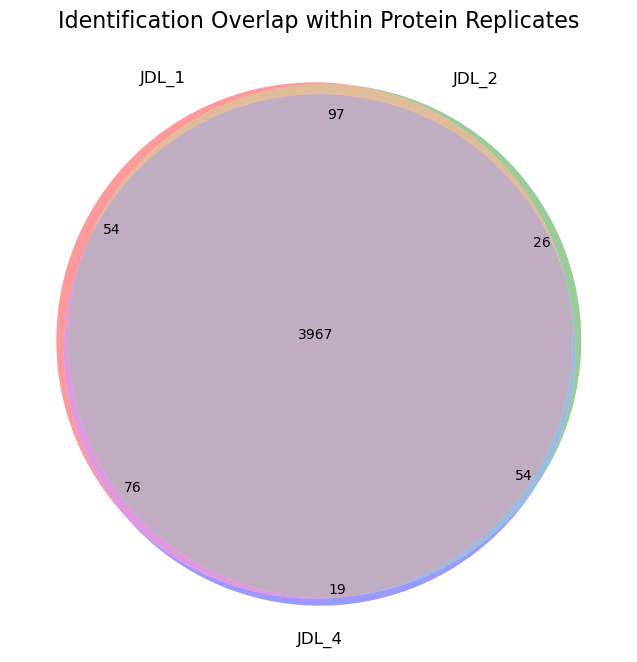

Analyzing samples: JDL_1, JDL_2, JDL_4

--- 1. Table of Identification Counts per Sample ---


,Number of Identifications
JDL_1,22476
JDL_2,21898
JDL_4,21352



--- 2. Bar Plot of Identification Counts per Sample ---


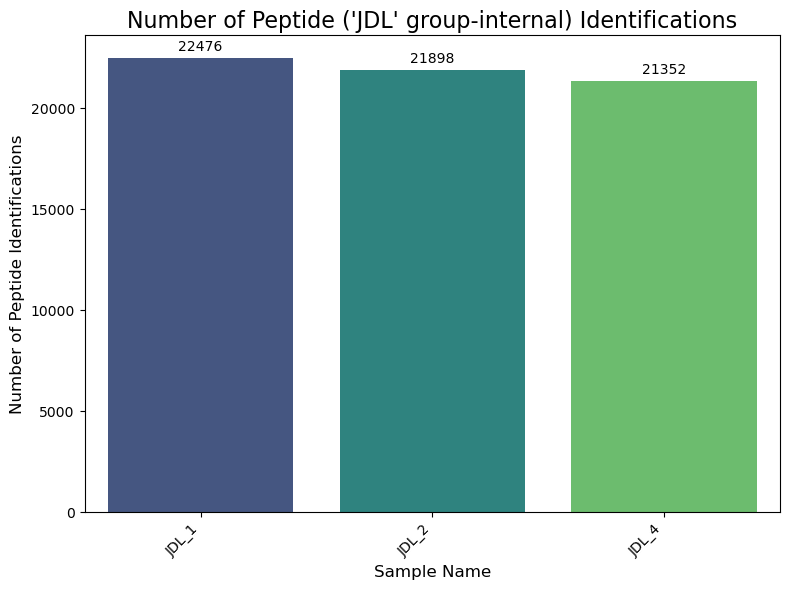


--- Intra-group Replicates Venn Diagram ---


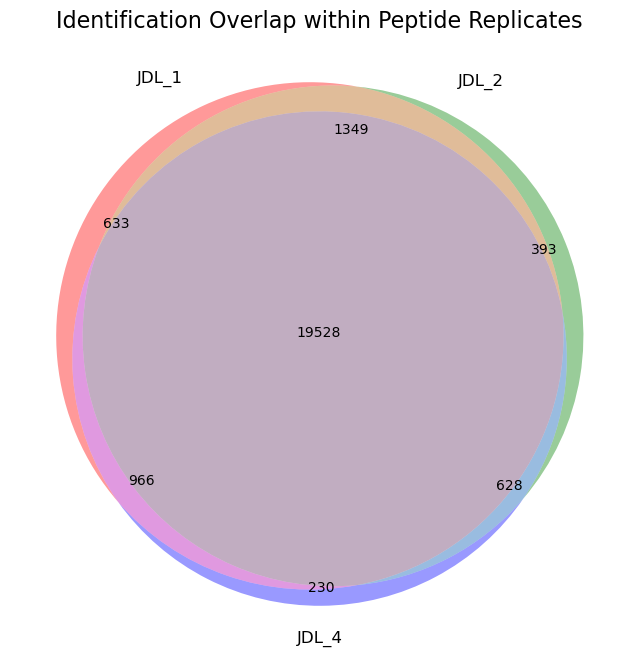

In [14]:
# ==============================================================================
#                      最终版 V3：主逻辑执行区 (修正调用参数)
# ==============================================================================

# ... (此区域的前半部分，即模式判断逻辑，保持不变) ...
is_single_group_analysis = False
columns_for_analysis = []
analysis_title_suffix = ""
if GROUP_TO_ANALYZE and GROUP_TO_ANALYZE in GROUP_DEFINITIONS:
    is_single_group_analysis = True
    columns_for_analysis = GROUP_DEFINITIONS[GROUP_TO_ANALYZE]
    analysis_title_suffix = f"'{GROUP_TO_ANALYZE}' group-internal"
    print(f"✅ Mode: [Intra-group Analysis] | Analyzing group: '{GROUP_TO_ANALYZE}' | Replicates: {len(columns_for_analysis)}")
else:
    is_single_group_analysis = False
    all_sample_columns = [col for df in [protein_df, peptide_df] for col in df.columns if col not in meta_data_columns]
    columns_for_analysis = sorted(list(set(all_sample_columns)))
    analysis_title_suffix = "All Samples"
    print(f"✅ Mode: [Inter-group Comparison] | Analyzing all defined samples")

def run_analysis_pipeline(dataframe, data_type):
    analyze_base_stats_and_inter_group_venn(
        dataframe=dataframe, 
        data_type=data_type, 
        columns_to_analyze=columns_for_analysis,
        all_group_definitions=GROUP_DEFINITIONS,
        venn_group_names=VENN_GROUPS_TO_COMPARE if not is_single_group_analysis else [],
        venn_threshold=VENN_REPLICATE_THRESHOLD
    )
    if is_single_group_analysis:
        num_replicates = len(columns_for_analysis)
        if num_replicates <= 1:
            print("\n--- Intra-group overlap analysis skipped (only one replicate) ---")
        elif num_replicates <= 3:
            plot_venn_for_replicates(dataframe, data_type, columns_for_analysis)
        else:
            plot_upset_for_replicates(dataframe, data_type, columns_for_analysis)

# --- 3. 执行分析 ---
if columns_for_analysis:
    print("-" * 50)
    
    # 【核心修正】将传入的 "蛋白质" 和 "肽段" 改为英文 "Protein" 和 "Peptide"
    # 分析蛋白质数据
    run_analysis_pipeline(protein_df, f"Protein ({analysis_title_suffix})")
    
    print("\n" + "=" * 80 + "\n") # 打印分隔符
    
    # 分析肽段数据
    run_analysis_pipeline(peptide_df, f"Peptide ({analysis_title_suffix})")
    
else:
    print("❌ Error: No sample columns found for analysis. Please check your 'GROUP_TO_ANALYZE' setting.")